# Tutorial

In [1]:
import graphviz
import numpy as np

import pybliss as bliss

### `bliss.Graph`: Undirected graph type

We can create a `bliss.Graph` in two ways:
1. Manually using `Graph.add_vertices`, `Graph.add_edge`
2. Using `Graph.from_dimacs`

In [2]:
# Make a pentagon graph with add_edge
pentagon = bliss.Graph(5)
for i in range(5):
    pentagon.add_edge(i, (i + 1) % 5)

# Print the dot code to check
print(pentagon.to_dot())

graph g {
v0 [label="0:0"];
v0 -- v1
v0 -- v4
v1 [label="1:0"];
v1 -- v2
v2 [label="2:0"];
v2 -- v3
v3 [label="3:0"];
v3 -- v4
v4 [label="4:0"];
}



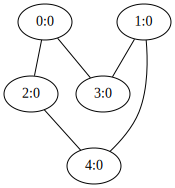

In [3]:
with open("pentagram.dimacs", "w") as fp:
    fp.write("""p edge 5 5
n 1 0
n 2 0
n 3 0
n 4 0
n 5 0
e 1 3
e 1 4
e 2 4
e 2 5
e 3 5""")
with open("pentagram.dimacs") as fp:
    # Make a pentagram from DIMACS
    pentagram = bliss.Graph.from_dimacs(fp)

graphviz.Source(pentagram.to_dot())

In [4]:
# Check if pentagon and pentagon are identical
pentagon == pentagram

False

### Canonicalization
- Use `Graph.get_permutation_to_canonical_form` to get permutation needed to obtain the canonical form of the graph.
- Use `Graph.permute` to permute the graph using the obtain the cannonical graph.

In [5]:
# Get permutations for canonical form
s1 = bliss.Stats()
s2 = bliss.Stats()
pentagon_perm = pentagon.get_permutation_to_canonical_form(s1)
pentagram_perm = pentagram.get_permutation_to_canonical_form(s2)
print("pentagon_perm =", pentagon_perm)
print("pentagram_perm =", pentagram_perm)

pentagon_perm = [4 3 1 0 2]
pentagram_perm = [4 1 2 3 0]


In [6]:
# Get the canonical form of each and check for identity
pentagon_canon = pentagon.permute(pentagon_perm)
pentagram_canon = pentagram.permute(pentagram_perm)
print("Canon(pentagon) ?= Canon(pentagram):", pentagon_canon == pentagram_canon)

Canon(pentagon) ?= Canon(pentagram): True


### Finding $\mathrm{Aut}(G)$

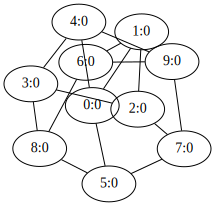

In [7]:
# Let's explore the automorphisms of the petersen graph
petersen = bliss.Graph(10)

for i in range(5):
    # Outer 5-cycle (0-1-2-3-4-0)
    petersen.add_edge(i, (i + 1) % 5)

    # Inner star-shaped connections (5-7-9-6-8-5)
    petersen.add_edge(i + 5, ((i + 2) % 5) + 5)

    # Connections between outer and inner nodes (0-5, 1-6, 2-7, 3-8, 4-9)
    petersen.add_edge(i, i + 5)

graphviz.Source(petersen.to_dot(), engine="neato")

### Graph.find_automorphisms

`bliss.Graph.find_automorphisms` reports all the automorphisms that were found via a callback function which is called each time a new generator for the automorphism group is found. The first argument for the callback *n* for the function is the length of the automorphism, and the second argument is the automorphism which comes in as a `Numpy` array.

In [8]:
def report(n, aut):
    print(f"Found a new automorphism generator of length {n}, aut = {aut}.")


s = bliss.Stats()
petersen.find_automorphisms(s, report)

print(f"Reported stats:\n{s}")

Found a new automorphism generator of length 10, aut = [0 1 2 7 5 4 6 3 9 8].
Found a new automorphism generator of length 10, aut = [0 4 3 8 5 1 9 2 6 7].
Found a new automorphism generator of length 10, aut = [1 2 3 8 6 0 7 4 5 9].
Reported stats:
Nodes:          10
Leaf nodes:     5
Bad nodes:      0
Canrep updates: 1
Generators:     3
Max level:      3
|Aut|:          120



### Adding resource constraints to Graph.find_automorphisms

`find_automorphisms` accepts a callback which can instruction the traversal to terminate early.

In [9]:
def report(n, aut):
    print(f"Found a new automorphism generator of length {n}, aut = {aut}.")


isearch = 0


def terminate():
    global isearch
    if isearch < 10:
        print(f"{isearch=}. Decided not to terminate")
        isearch += 1
        return False
    else:
        print("--->Terminating early<---")
        return True


s = bliss.Stats()
petersen.find_automorphisms(s, report, terminate)

print(f"Reported stats:\n{s}")

isearch=0. Decided not to terminate
isearch=1. Decided not to terminate
isearch=2. Decided not to terminate
isearch=3. Decided not to terminate
Found a new automorphism generator of length 10, aut = [0 1 2 7 5 4 6 3 9 8].
isearch=4. Decided not to terminate
isearch=5. Decided not to terminate
isearch=6. Decided not to terminate
isearch=7. Decided not to terminate
Found a new automorphism generator of length 10, aut = [0 4 3 8 5 1 9 2 6 7].
isearch=8. Decided not to terminate
isearch=9. Decided not to terminate
--->Terminating early<---
Reported stats:
Nodes:          7
Leaf nodes:     4
Bad nodes:      0
Canrep updates: 1
Generators:     2
Max level:      3
|Aut|:          12



### Coloring a graph

Recall that bliss always provides operations on colored graphs i.e. graphs of the form $(V, E, C)$.

By default all vertices have color=0. Call `Graph.change_color` to set the color of a vertex.

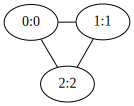

In [10]:
k3 = bliss.Graph(3)
for i in range(3):
    k3.add_edge(i, (i + 1) % 3)
    # set the color of each i-vertex as i.
    k3.change_color(i, i)

# Check the graph has colored vertices.
graphviz.Source(k3.to_dot(), engine="neato")

### Visualization

- Print the graph in [DIMACS](https://users.aalto.fi/~tjunttil/bliss/fileformat.html) format using `Graph.to_dimacs`.
- Write the graph in [DIMACS](https://users.aalto.fi/~tjunttil/bliss/fileformat.html) format using `Graph.write_dimacs`.
- Similarly, `to_dot`, `write_dot` are provided.

In [11]:
print(petersen.to_dimacs())

p edge 10 15
n 1 0
n 2 0
n 3 0
n 4 0
n 5 0
n 6 0
n 7 0
n 8 0
n 9 0
n 10 0
e 1 2
e 1 5
e 1 6
e 2 3
e 2 7
e 3 4
e 3 8
e 4 5
e 4 9
e 5 10
e 6 8
e 6 9
e 7 9
e 7 10
e 8 10



In [12]:
with open("petersen.dimacs", "w") as fp:
    petersen.write_dimacs(fp)

# Check the contents of written file
with open("petersen.dimacs") as fp:
    print(fp.read())

p edge 10 15
n 1 0
n 2 0
n 3 0
n 4 0
n 5 0
n 6 0
n 7 0
n 8 0
n 9 0
n 10 0
e 1 2
e 1 5
e 1 6
e 2 3
e 2 7
e 3 4
e 3 8
e 4 5
e 4 9
e 5 10
e 6 8
e 6 9
e 7 9
e 7 10
e 8 10



### `bliss.Digraph`: Directed graphs

All the operations described on `bliss.Graph` hold, except the graph is now directed.

In a similar fashion to `bliss.Graph`. we can instantiate a directed graph as follows:

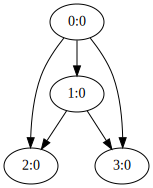

In [13]:
g = bliss.Digraph(4)

g.add_edge(0, 1)
g.add_edge(0, 2)
g.add_edge(0, 3)
g.add_edge(1, 2)
g.add_edge(1, 3)

graphviz.Source(g.to_dot())

# Numpy interopability

It is easy to convert `Numpy` objects to Bliss instances. We can use `(di)graph_(to|from)_numpy` routines to load from or save to numpy arrays from bliss graph or digraphs. We now demonstrate how to make use of numpy to verify that pentagon and pentagram directed graphs
have the same canonical form.

In [14]:
# Create edges matrices
pentagon_edges = np.array([[0, 1], [1, 2], [2, 3], [3, 4], [4, 0]])
pentagram_edges = np.array([[0, 2], [2, 4], [4, 1], [1, 3], [3, 0]])

In [15]:
# Create bliss digraphs from the numpy arrays
pentagon = bliss.digraph_from_numpy(5, pentagon_edges, np.zeros(5, np.int8))
pentagram = bliss.digraph_from_numpy(5, pentagram_edges, np.zeros(5, np.int8))

In [16]:
# Get permutations
perm1 = pentagon.get_permutation_to_canonical_form(bliss.Stats())
perm2 = pentagram.get_permutation_to_canonical_form(bliss.Stats())
print(f"{perm1 = }")
print(f"{perm2 = }")

perm1 = array([4, 3, 0, 1, 2], dtype=uint32)
perm2 = array([4, 1, 3, 2, 0], dtype=uint32)


In [17]:
# Now verify that the edges remain the same after applying the permutation
assert np.all(perm1[pentagon_edges] == perm2[pentagram_edges])
print("Verified!")

Verified!
